# Lesson 2: Series and Parallel Resistors

## Theory

### Series Resistors
- Resistors connected **end-to-end**, so the **same current** flows through each.
- Total resistance \( R_{\text{series}} \) is the **sum**:
\[
R_{\text{series}} = R_1 + R_2 + R_3 + \cdots
\]
- Voltage divides among resistors:
\[
V_{\text{total}} = V_1 + V_2 + V_3 + \cdots
\]

### Parallel Resistors
- Resistors connected with both ends tied together, so **same voltage** across each.
- Total resistance is given by:
\[
\frac{1}{R_{\text{parallel}}} = \frac{1}{R_1} + \frac{1}{R_2} + \frac{1}{R_3} + \cdots
\]
- Current divides among resistors:
\[
I_{\text{total}} = I_1 + I_2 + I_3 + \cdots
\]


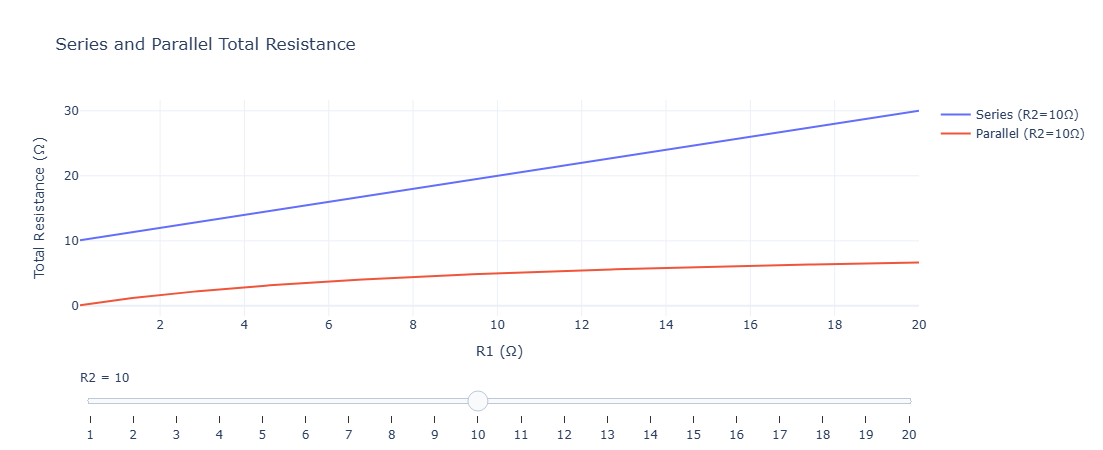

In [2]:
import numpy as np
import plotly.graph_objects as go

def total_resistance_series_parallel(R1, R2):
    R_series = R1 + R2
    R_parallel = 1 / (1/R1 + 1/R2)
    return R_series, R_parallel

R1_vals = np.linspace(0.1, 20, 200)
R2_vals = np.linspace(0.1, 20, 200)

# Create figure with two traces for a default R2 = 10
fig = go.Figure()

fig.add_trace(go.Scatter(x=R1_vals, y=R1_vals + 10, mode='lines', name='Series (R2=10Ω)'))
fig.add_trace(go.Scatter(x=R1_vals, y=1/(1/R1_vals + 1/10), mode='lines', name='Parallel (R2=10Ω)'))

# Add sliders for R2
steps = []
for R2 in np.arange(1, 21, 1):
    y_series = R1_vals + R2
    y_parallel = 1 / (1/R1_vals + 1/R2)
    step = dict(
        method="update",
        args=[{"y": [y_series, y_parallel]},
              {"title": f"Total Resistance vs R1 (R2={R2:.1f} Ω)"}],
        label=str(R2)
    )
    steps.append(step)

sliders = [dict(
    active=9,
    currentvalue={"prefix": "R2 = "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders,
    xaxis_title="R1 (Ω)",
    yaxis_title="Total Resistance (Ω)",
    title="Series and Parallel Total Resistance",
    template="plotly_white",
    height=450
)

fig.show()
